Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: colwise* >left is a 4x1 matrix but right is a 4x1 matrix


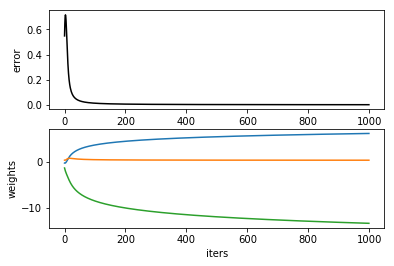

In [1]:
import numpy as np
import pyCalc as p
import random
p.setMode("quiet")
xs = p.var("constant",np.array([
                                   [1,0,0],
                                   [1,1,0],
                                   [1,0,1],
                                   [1,1,1]
                               ]
                               , dtype= float))
ys = p.var("constant", np.array(
                                [0,0,1,1]
                                , dtype=float))
np.random.seed(1)
weights =2*np.random.random((3,1)) - 1
ws = p.var("independent", 3,1)

l0 = p.function(xs,ws, "*") #4x1
l1 = p.function(l0, "sigmoid") #4x1

l1_error = p.function(ys.T(), l1, "-")
sig = p.function(l1, "sigmoid_r")
l1_delta = p.function(sig, l1_error, "colwise*")
tmp = p.function(xs.T(),l1_delta, "*")

g= []
h = []
for i in range(1000):
    weights = weights - tmp.value(dict([(ws,weights)]))
    g.append(np.sum(l1_error.value(dict([(ws,weights)]))))
    h.append(weights.tolist())


import matplotlib.pyplot as plt
x_data = [i for i in range(len(g))]
y_data = [[h[i][j] for i in range(len(h))] for j in range(len(h[0]))]
plt.figure(1)
plt.subplot(211)
plt.ylabel('error')
plt.xlabel('iters')
plt.plot(x_data, g, 'k')

plt.subplot(212)
plt.ylabel('weights')
plt.xlabel('iters')
for d in y_data:
    plt.plot(x_data, d)

plt.show()